In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction

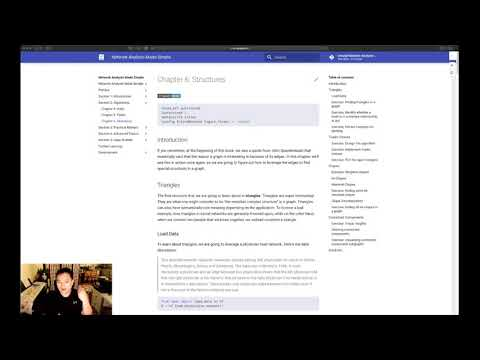

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="3DWSRCbPPJs", width="100%")

If you remember, at the beginning of this book,
we saw a quote from John Quackenbush that essentially said
that the reason a graph is interesting is because of its edges.
In this chapter, we'll see this in action once again,
as we are going to figure out how to leverage the edges
to find special _structures_ in a graph.

## Triangles

The first structure that we are going to learn about is **triangles**.
Triangles are super interesting!
They are what one might consider to be
"the simplest complex structure" in a graph.
Triangles can also have semantically-rich meaning depending on the application.
To borrow a bad example, love triangles in social networks are generally frowned upon,
while on the other hand, when we connect two people that we know together,
we instead _complete_ a triangle.

### Load Data

To learn about triangles,
we are going to leverage a physician trust network.
Here's the data description:

> This directed network captures innovation spread among 246 physicians 
> for towns in Illinois, Peoria, Bloomington, Quincy and Galesburg.
> The data was collected in 1966.
> A node represents a physician and an edge between two physicians
> shows that the left physician told that the right physician is his friend
> or that he turns to the right physician if he needs advice
> or is interested in a discussion.
> There always only exists one edge between two nodes
> even if more than one of the listed conditions are true.

In [6]:
import sys
if not (r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple' in sys.path):
    sys.path.insert(0, r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple')
from nams import load_data as cf
import networkx as nx
G = cf.load_physicians_network()

### Exercise: Finding triangles in a graph

This exercise is going to flex your ability
to "think on a graph", just as you did in the previous chapters.

> Leveraging what you know, can you think of a few strategies
> to find triangles in a graph?

In [5]:
from nams.solutions.structures import triangle_finding_strategies

triangle_finding_strategies()

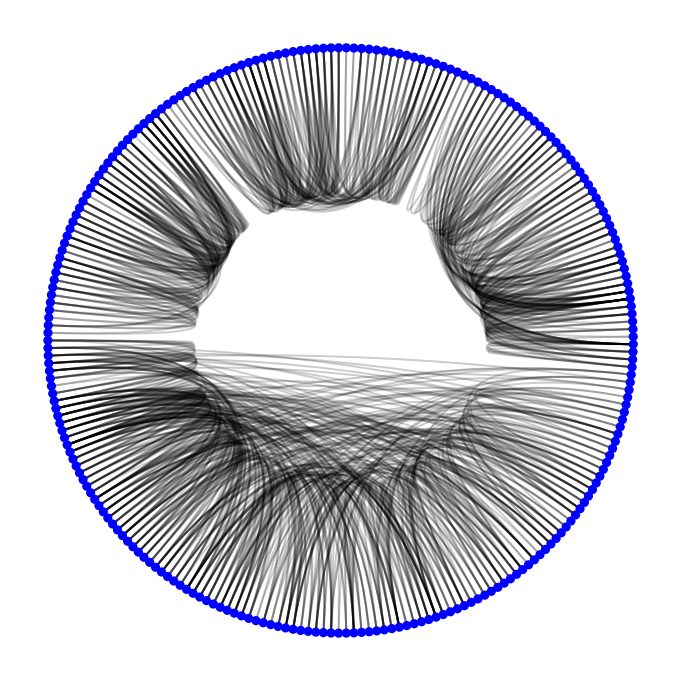

In [14]:
import nxviz as nv
c = nv.CircosPlot(G)
c.draw()

### Exercise: Identify whether a node is in a triangle relationship or not

Let's now get down to implementing this next piece of code.

> Write a function that identifies whether a node is or is not in a triangle relationship.
> It should take in a graph `G` and a node `n`,
> and return a boolean True if the node `n` is in any triangle relationship
> and boolean False if the node `n` is not in any triangle relationship.

A hint that may help you:

> Every graph object `G` has a `G.has_edge(n1, n2)` method that you can use to identify whether a graph has an edge between `n1` and `n2`.

Also:

> `itertools.combinations` lets you iterate over every _K-combination_ of items in an iterable.

In [20]:
from itertools import combinations

def in_triangle(G, node):
    # Your answer here
    '''Returns whether a given node is present in a triangle relationship or not'''
    neigbors = G.neighbors(node)
    for neighbor1, neighbor2 in combinations(neighbors, 2):
#         if ( (neighbor1 in G.neighbors(neighbor2)) and (neighbor2 in G.neighbors(neighbor1)) ):
#             return True 
        if G.has_edge(neighbor1, neighbor2):
            return True
    return False

# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import in_triangle

# UNCOMMENT THE NEXT LINE TO SEE MY ANSWER
# in_triangle??

Now, test your implementation below!
The code cell will not error out if your answer is correct.

In [21]:
from random import sample
import networkx as nx

def test_in_triangle():
    nodes = sample(list(G.nodes()), 10)
    for node in nodes:
        assert in_triangle(G, 3) == bool(nx.triangles(G, 3))
        
test_in_triangle()

As you can see from the test function above,
NetworkX provides an `nx.triangles(G, node)` function.
It __returns the number of triangles__ that a node is involved in.
We convert it to boolean as a hack to check whether or not
a node is involved in a triangle relationship
because 0 is equivalent to boolean `False`,
while any non-zero number is equivalent to boolean `True`.

### Exercise: Extract triangles for plotting

We're going to leverage another piece of knowledge that you already have:
the ability to extract subgraphs.
We'll be plotting all of the triangles that a node is involved in.

> Given a node, write a function that extracts out
> all of the neighbors that it is in a triangle relationship with.
> Then, in a new function,
> implement code that plots only the subgraph
> that contains those nodes.

In [50]:
def get_triangle_neighbors(G, n):
    # Your answer here
    result = []
    neighbors = list(G.neighbors(n))
    nSize = len(neighbors)
    # keep track of whether of not the neighbor has been 
    # added (so it doesn't have to keep checking if a
    # neighbor has been added)
    nNotAdded = [True]*nSize # sacrifice space for speed
    for i in range(nSize):
        for j in range(i+1, nSize):
            (neighbor1, neighbor2) = (neighbors[i], neighbors[j])
            if G.has_edge(neighbor1, neighbor2):
                # they form a triangle relation
                if nNotAdded[i]:
                    result.append(neighbor1)
                    nNotAdded[i] = False 
                if nNotAdded[j]:
                    result.append(neighbor2)
                    nNotAdded[j] = False 
                
    return result

In [51]:
a = get_triangle_neighbors(G, 99)
a.append(99)
a

[84, 30, 73, 55, 99]

In [47]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import get_triangle_neighbors

# UNCOMMENT THE NEXT LINE TO SEE MY ANSWER
get_triangle_neighbors??

Signature: get_triangle_neighbors(G, node) -> set
Source:   
def get_triangle_neighbors(G, node) -> set:
    """
    Return neighbors involved in triangle relationship with node.
    """
    neighbors1 = set(G.neighbors(node))
    triangle_nodes = set()
    for nbr1, nbr2 in combinations(neighbors1, 2):
        if G.has_edge(nbr1, nbr2):
            triangle_nodes.add(nbr1)
            triangle_nodes.add(nbr2)
    return triangle_nodes
File:      c:\users\pui_s\documents\concordia-bootcamps\network-analysis-made-simple\nams\solutions\structures.py
Type:      function


In [37]:
list(G.neighbors(99))

[84, 30, 73, 55, 58]

In [55]:
def plot_triangle_relations(G, n, with_labels=False):
    # Your answer here
    H = get_triangle_neighbors(G, n)
    H.append(n)
    H = G.subgraph(H)
    nx.draw(H, with_labels=with_labels)

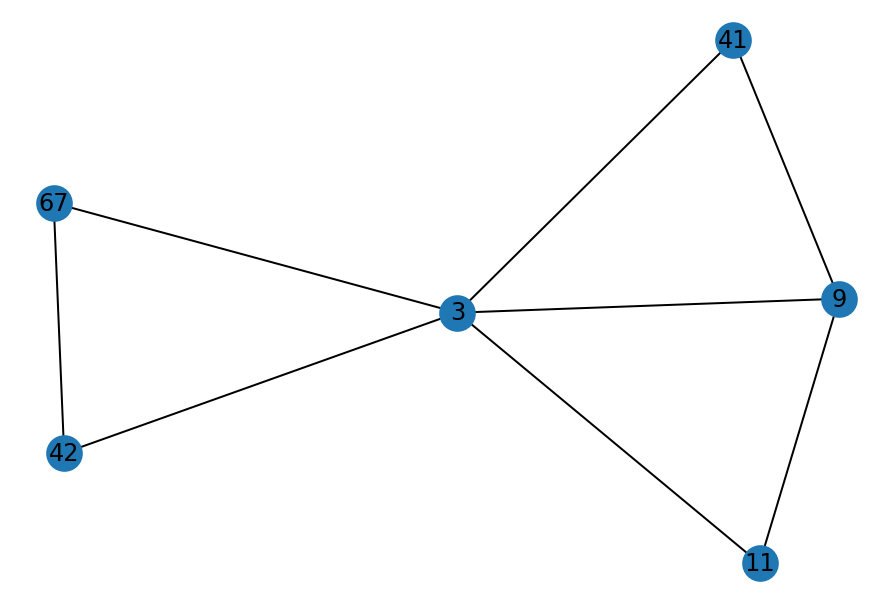

In [57]:
plot_triangle_relations(G, 3, True)

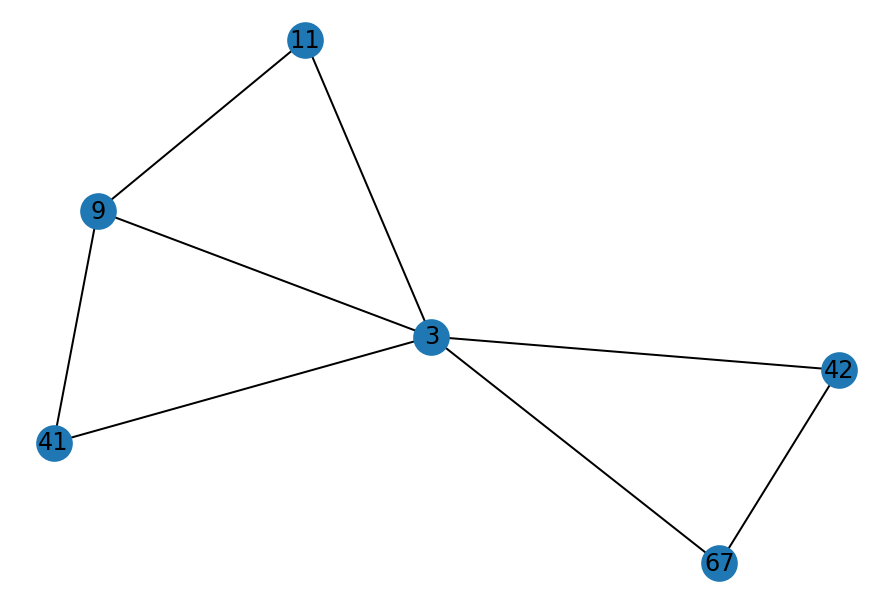

In [58]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import plot_triangle_relations

plot_triangle_relations(G, 3)

## Triadic Closure

In professional circles, making connections between two people
is one of the most valuable things you can do professionally.
What you do in that moment is what we would call
**triadic closure**.
Algorithmically, we can do the same thing
if we maintain a graph of connections!

Essentially, what we are looking for
are "open" or "unfinished" triangles".

In this section, we'll try our hand at implementing
a rudimentary triadic closure system.

### Exercise: Design the algorithm

> What graph logic would you use to identify triadic closure opportunities?
> Try writing out your general strategy, or discuss it with someone.

In [60]:
from nams.solutions.structures import triadic_closure_algorithm

# UNCOMMENT FOR MY ANSWER
triadic_closure_algorithm()

### Exercise: Implement triadic closure.

Now, try your hand at implementing triadic closure.

> Write a function that takes in a graph `G` and a node `n`,
> and returns all of the neighbors that are potential triadic closures
> with `n` being the center node.


In [ ]:
def get_open_triangles_neighbors(G, n):
    # Your answer here
    pass

In [59]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import get_open_triangles_neighbors

# UNCOMMENT THE NEXT LINE TO SEE MY ANSWER
get_open_triangles_neighbors??

Signature: get_open_triangles_neighbors(G, node) -> set
Source:   
def get_open_triangles_neighbors(G, node) -> set:
    """
    Return neighbors involved in open triangle relationships with a node.
    """
    open_triangle_nodes = set()
    neighbors = list(G.neighbors(node))

    for n1, n2 in combinations(neighbors, 2):
        if not G.has_edge(n1, n2):
            open_triangle_nodes.add(n1)
            open_triangle_nodes.add(n2)

    return open_triangle_nodes
File:      c:\users\pui_s\documents\concordia-bootcamps\network-analysis-made-simple\nams\solutions\structures.py
Type:      function


### Exercise: Plot the open triangles

> Now, write a function that takes in a graph `G` and a node `n`,
> and plots out that node `n` and all of the neighbors
> that it could help close triangles with.


In [ ]:
def plot_open_triangle_relations(G, n):
    # Your answer here
    pass

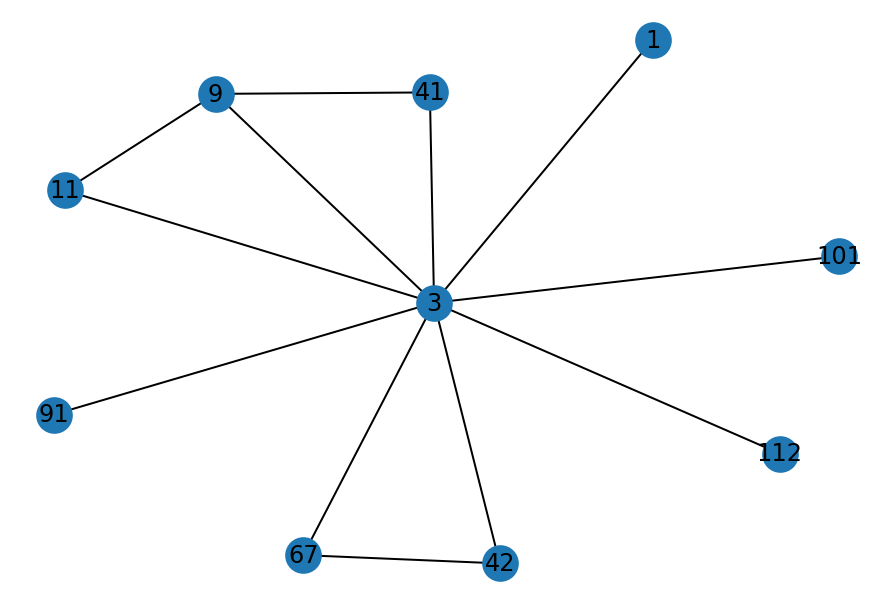

In [61]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import plot_open_triangle_relations

plot_open_triangle_relations(G, 3)

## Cliques

Triangles are interesting in a graph theoretic setting
because triangles are the simplest complex clique that exist.

But wait!
What is the definition of a "clique"?

> A "clique" is a set of nodes in a graph
> that are fully connected with one another
> by edges between them.

### Exercise: Simplest cliques

Given this definition, what is the simplest "clique" possible?
> Two nodes connected with an edge

How about the simplest complex clique ?
> 3 nodes (triangle)

In [15]:
from nams.solutions.structures import simplest_clique
    
# UNCOMMENT THE NEXT LINE TO SEE MY ANSWER
simplest_clique()

### $k$-Cliques

Cliques are identified by their size $k$,
which is the number of nodes that are present in the clique.

A triangle is what we would consider to be a $k$-clique where $k=3$.

A square with cross-diagonal connections is what we would consider to be
a $k$-clique where $k=4$.

By now, you should get the gist of the idea.

### Maximal Cliques

Related to this idea of a $k$-clique is another idea called "maximal cliques".

Maximal cliques are defined as follows:

> A maximal clique is a subgraph of nodes in a graph
> 
> 1. to which no other node can be added to it and 
> 2. still remain a clique.

NetworkX provides a way to find all maximal cliques:

In [62]:
# I have truncated the output to the first 5 maximal cliques.
list(nx.find_cliques(G))[0:5]

[[1, 2], [1, 3], [1, 4, 5, 6], [1, 7], [1, 72]]

### Exercise: finding sized-$k$ maximal cliques

> Write a generator function that yields all maximal cliques of size $k$.

I'm requesting a generator as a matter of good practice;
you never know when the list you return might explode in memory consumption,
so generators are a cheap and easy way to reduce memory usage.

In [64]:
def size_k_maximal_cliques(G, k):
    # Your answer here
    result = []
    for nodes in combinations(list(G.nodes()), k):
        add = True
        for n1, n2 in combinations(nodes, 2):
            if not G.has_edge(n1, n2):
                # if any of the 2 not connected, justmove onto next group
                add = False
                break
        if add:
            result.append(nodes)
    return result
        

In [63]:
G.has_edge??

Signature: G.has_edge(u, v)
Source:   
    def has_edge(self, u, v):
        """Returns True if the edge (u, v) is in the graph.

        This is the same as `v in G[u]` without KeyError exceptions.

        Parameters
        ----------
        u, v : nodes
            Nodes can be, for example, strings or numbers.
            Nodes must be hashable (and not None) Python objects.

        Returns
        -------
        edge_ind : bool
            True if edge is in the graph, False otherwise.

        Examples
        --------
        >>> G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc
        >>> G.has_edge(0, 1)  # using two nodes
        True
        >>> e = (0, 1)
        >>> G.has_edge(*e)  #  e is a 2-tuple (u, v)
        True
        >>> e = (0, 1, {"weight": 7})
        >>> G.has_edge(*e[:2])  # e is a 3-tuple (u, v, data_dictionary)
        True

        The following syntax are equivalent:

        >>> G.has_edge(0, 1)
        True
        >>> 1 in G[0]  #

In [ ]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import size_k_maximal_cliques

Now, test your implementation against the test function below.

In [65]:
def test_size_k_maximal_cliques(G, k):
    clique_generator = size_k_maximal_cliques(G, k)
    for clique in clique_generator:
        assert len(clique) == k
    
test_size_k_maximal_cliques(G, 5)

KeyboardInterrupt: 

### Clique Decomposition

One _super_ neat property of cliques
is that every clique of size $k$
can be decomposed to the set of cliques of size $k-1$.

Does this make sense to you?
If not, think about triangles (3-cliques).
They can be decomposed to three edges (2-cliques).

Think again about 4-cliques.
Housed within 4-cliques are four 3-cliques.
_Draw it out if you're still not convinced!_

### Exercise: finding all $k$-cliques in a graph

> Knowing this property of $k$-cliques,
> write a generator function that yields all $k$-cliques in a graph,
> leveraging the `nx.find_cliques(G)` function.

Some hints to help you along:

> If a $k$-clique can be decomposed to its $k-1$ cliques,
> it follows that the $k-1$ cliques can be decomposed into $k-2$ cliques,
> and so on until you hit 2-cliques.
> This implies that all cliques of size $k$
> house cliques of size $n < k$, where $n >= 2$.

In [ ]:
def find_k_cliques(G, k):
    # your answer here
    pass

In [ ]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import find_k_cliques

def test_find_k_cliques(G, k):
    for clique in find_k_cliques(G, k):
        assert len(clique) == k
        
test_find_k_cliques(G, 3)

## Connected Components

Now that we've explored a lot around cliques,
we're now going to explore this idea of "connected components".
To do so, I am going to have you draw the graph
that we are working with.


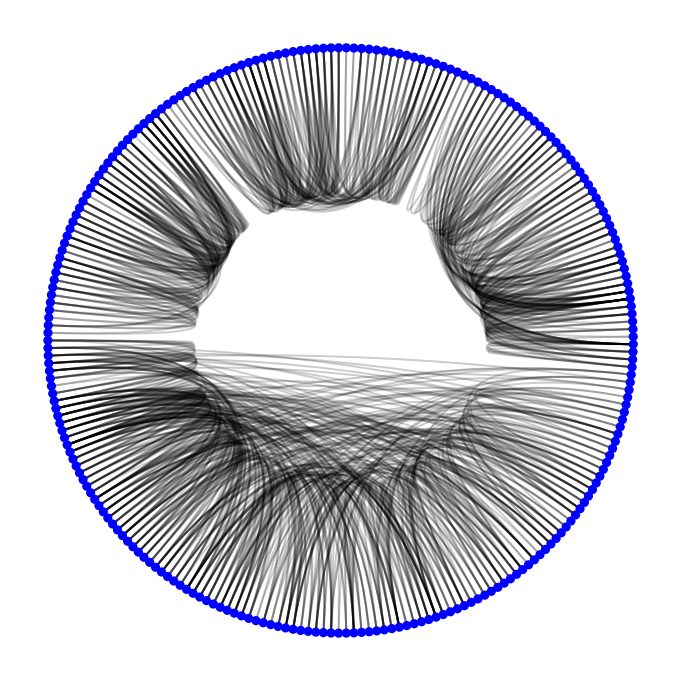

In [68]:
import nxviz as nv

c = nv.CircosPlot(G)
c.draw()

### Exercise: Visual insights

From this rendering of the CircosPlot,
what visual insights do you have about the structure of the graph?

In [69]:
from nams.solutions.structures import visual_insights

# UNCOMMENT TO SEE MY ANSWER
visual_insights()


We might hypothesize that there are 3,
maybe 4 different "communities" of nodes
that are completely disjoint with one another,
i.e. there is no path between them.



### Defining connected components

From [Wikipedia](https://en.wikipedia.org/wiki/Connected_component_%28graph_theory%29):

> In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

NetworkX provides a function to let us find all of the connected components:

In [70]:
ccsubgraph_nodes = list(nx.connected_components(G))

Let's see how many connected component subgraphs are present:

In [71]:
len(ccsubgraph_nodes)

4

In [103]:
ccsubgraph_nodes[0]

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117}

### Exercise: visualizing connected component subgraphs

In this exercise, we're going to draw a circos plot of the graph, 
but colour and order the nodes by their connected component subgraph.

Recall Circos API:

```python
c = CircosPlot(G, node_order='node_attribute', node_color='node_attribute')
c.draw()
plt.show()  # or plt.savefig(...)
```

Follow the steps along here to accomplish this.

> Firstly, label the nodes with a unique identifier for connected component subgraph
> that it resides in.
> Use `subgraph` to store this piece of metadata.

In [108]:
import numpy as np 
def label_connected_component_subgraphs(G):
    # Your answer here
#     return G
    G_labelled = G.copy() 
    ccsubgraph_nodes = list(nx.connected_components(G))
    ccAttributeLabel = 0
    attrs = {}
    for eachCC in ccsubgraph_nodes:
        # for each subgraph
        n = len(list(eachCC))
        attrs.update(dict(np.concatenate((np.reshape(list(eachCC), newshape=(n,1)), np.reshape([{'ccAttribute':ccAttributeLabel}]*n, newshape=(n,1))), axis=1)))
        ccAttributeLabel  =ccAttributeLabel + 1
    nx.set_node_attributes(G_labelled, attrs)
    return G_labelled

In [ ]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import label_connected_component_subgraphs
G_labelled = label_connected_component_subgraphs(G)

# UNCOMMENT TO SEE THE ANSWER
# label_connected_component_subgraphs??

> Now, draw a CircosPlot with the node order and colouring
> dictated by the `subgraph` key.

In [110]:
import matplotlib.pyplot as plt
def plot_cc_subgraph(G):
    # Your answer here
    c = nv.CircosPlot(G, node_order='ccAttribute', node_color='ccAttribute')
    c.draw()
    plt.show()

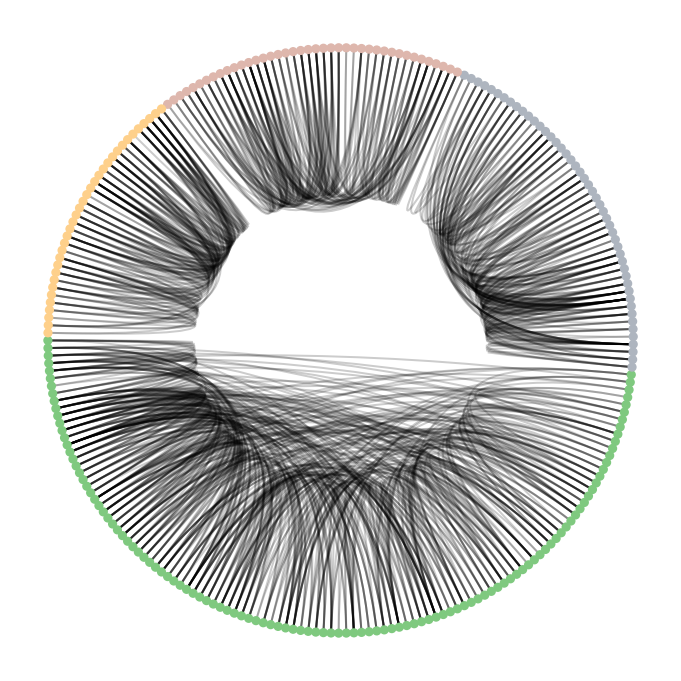

In [111]:
plot_cc_subgraph(label_connected_component_subgraphs(G))

In [ ]:
# COMMENT OUT THE IMPORT LINE TO TEST YOUR ANSWER
from nams.solutions.structures import plot_cc_subgraph
from nxviz import annotate

plot_cc_subgraph(G_labelled)
annotate.circos_group(G_labelled, group_by="subgraph")

Using an arc plot will also clearly illuminate for us
that there are no inter-group connections.

In [ ]:
nv.arc(G_labelled, group_by="subgraph", node_color_by="subgraph")
annotate.arc_group(G_labelled, group_by="subgraph", rotation=0)

_Voila!_ It looks quite clear that there are indeed four disjoint group of physicians.

## Solutions

In [ ]:
from nams.solutions import structures
import inspect

print(inspect.getsource(structures))